In [1]:
# Import the necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf

# Define a function for executing SQL queries
pysqldf = lambda q: sqldf(q, globals())

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

Before starting this analysis, I've split the "summer_events.csv" dataframe into 2 separate csv files, one for summer events and another for winter events.
***
Code used:

In [2]:
# # Create separate dataframes for summer and winter events
# summer_df = df_athletes[df_athletes["Season"] == "Summer"]
# winter_df = df_athletes[df_athletes["Season"] == "Winter"]

# # Export dataframes to CSV files
# summer_df.to_csv("summer_events.csv", index = False)
# winter_df.to_csv("winter_events.csv", index = False)

In [3]:
# Create 2 new dataframes for summer and winter events:
summer_events = pd.read_csv("summer_events.csv")
winter_events = pd.read_csv("winter_events.csv")

The first thing i want to look at is how athletes are spread beteween summer and winter events, while also comparing what is the male vs. female athletes ratio.

In [4]:
# SQL query for athletes participating in summer events:
print(
      pysqldf('''SELECT Sex AS sex
                        , COUNT(*) AS athlete_count
                        , ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) over (), 2) AS ratio
                 FROM summer_events
                 GROUP BY Sex''')
    )

  sex  athlete_count  ratio
0   F          59443  26.71
1   M         163109  73.29


In [5]:
# SQL query for athletes participating in winter events:
print(
      pysqldf('''SELECT Sex AS sex
                        , COUNT(*) AS athlete_count
                        , ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) over (), 2) AS ratio
                 FROM winter_events
                 GROUP BY Sex''')
    )

  sex  athlete_count  ratio
0   F          15079  31.05
1   M          33485  68.95


**The results above show the following:**
1. During **summer events**, athlete participants consist in roughly **73.3% males** and **26.7% females**
2. During **winter events**, athlete participants consist in roughly **69% males** and **31% females**
Therefore, there is a slight increase in female participants during winter events, compared to summer ones.
<br> 
Even so, male athletes have the large majority of participation in both seasonal events.

Next, I want to have a look at the averages regarding athlete age, weight and height, comparing male vs. female participants.

In [6]:
# SQL query for athletes participating in summer events:
print(
      pysqldf('''SELECT Sex AS sex
                          , ROUND(AVG(Age), 2) AS age_average
                          , ROUND(AVG(Height), 2) AS height_average
                          , ROUND(AVG(Weight), 2) AS weight_average
                 FROM summer_events
                 GROUP BY Sex
                 ''')
    )

  sex  age_average  height_average  weight_average
0   F        23.66          168.17           60.09
1   M        26.44          178.90           75.60


In [7]:
# SQL query for athletes participating in winter events:
print(
      pysqldf('''SELECT Sex AS sex
                          , ROUND(AVG(Age), 2) AS age_average
                          , ROUND(AVG(Height), 2) AS height_average
                          , ROUND(AVG(Weight), 2) AS weight_average
                 FROM winter_events
                 GROUP BY Sex
                 ''')
    )

  sex  age_average  height_average  weight_average
0   F        24.01          166.53           59.76
1   M        25.50          178.67           76.36


#### Given these results, it is clear that male athletes have a slightly higher average age when compared to the female athletes.

### Things to keep in mind!
On the initial EDA, I've realised that there are a lot of missing values in the Age, Weight and Height columns from the "athlete_events.csv" dataset, as follows:
 - Age         9474
 - Height     60171
 - Weight     62875
 ***
Considering these missing values, the previous results might not represent the real situation as accurately as needed for the analysis.

Next, I will take a look at how athlete count has increased / decreased over the analyzed period, while comparing male vs. female participants.

In [8]:
# SQL query for male athletes participating in summer events:
summer_athletes_total = (pysqldf('''
                                   SELECT Year AS year
                                            , COUNT(*) AS total_athletes
                                   FROM summer_events
                                   GROUP BY Year
                                ''')
                        )
# SQL query for male athletes participating in winter events:
winter_athletes_total = (pysqldf('''
                                   SELECT Year AS year
                                             , COUNT(*) AS total_athletes
                                   FROM winter_events
                                   GROUP BY Year
                                ''')    
                        )                

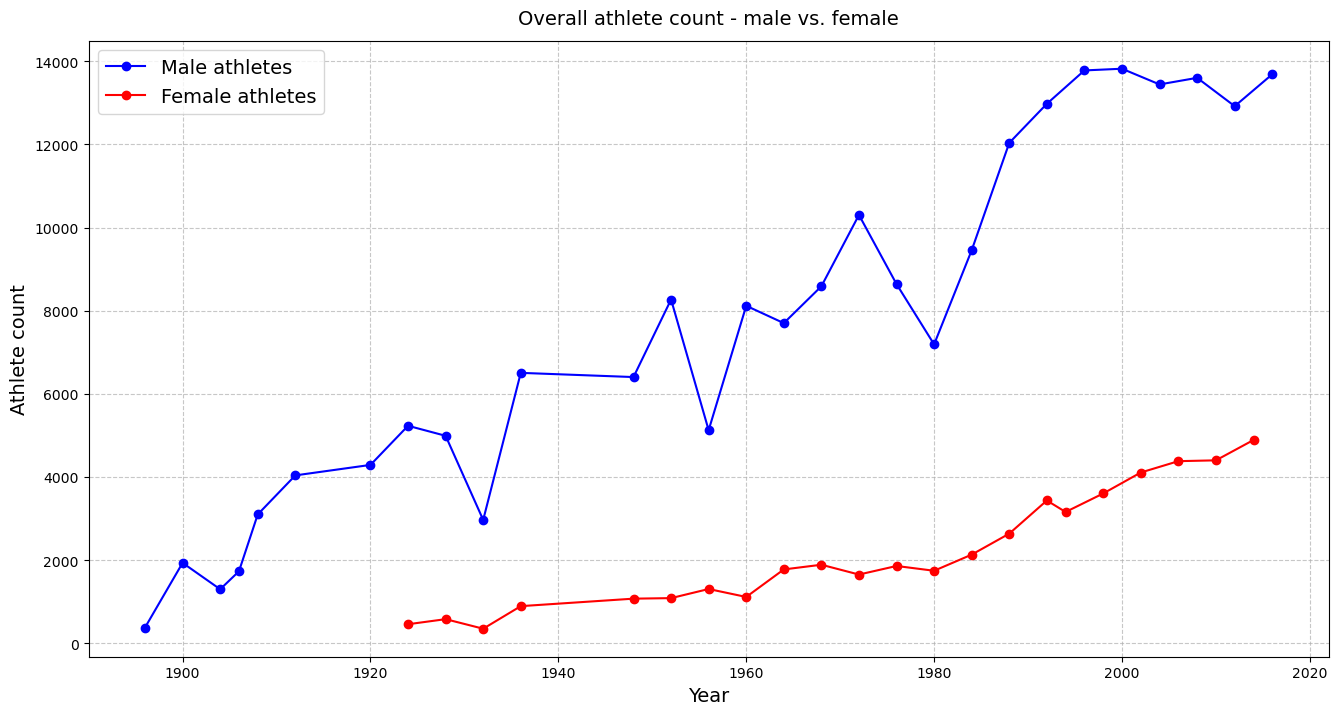

In [9]:
# Visualize the results using a line chart:
plt.figure(figsize = (16,8))

plt.plot(summer_athletes_total.year, summer_athletes_total.total_athletes, color = "blue", 
         marker = "o", label = "Male athletes")
plt.plot(winter_athletes_total.year, winter_athletes_total.total_athletes, color = "red", 
         marker = "o", label = "Female athletes")
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Athlete count", fontsize = 14)
plt.title("Overall athlete count - male vs. female", fontsize = 14, pad = 12)
plt.legend(fontsize = 14, loc = "upper left")

# Add grid:
plt.grid(True, linestyle = "--", alpha = 0.7)

plt.show()

In [10]:
# SQL query for male athletes participating in summer events:
summer_athletes_male = (pysqldf('''
                                   SELECT Year AS year
                                                    , COUNT(*) AS total_athletes
                                   FROM summer_events
                                   WHERE Sex = "M"
                                   GROUP BY Year
                                ''')
                       )
# SQL query for female athletes participating in summer events:
summer_athletes_female = (pysqldf('''
                                     SELECT Year AS year
                                                    , COUNT(*) AS total_athletes
                                     FROM summer_events
                                     WHERE Sex = "F"
                                     GROUP BY Year
                                  ''')
                         )

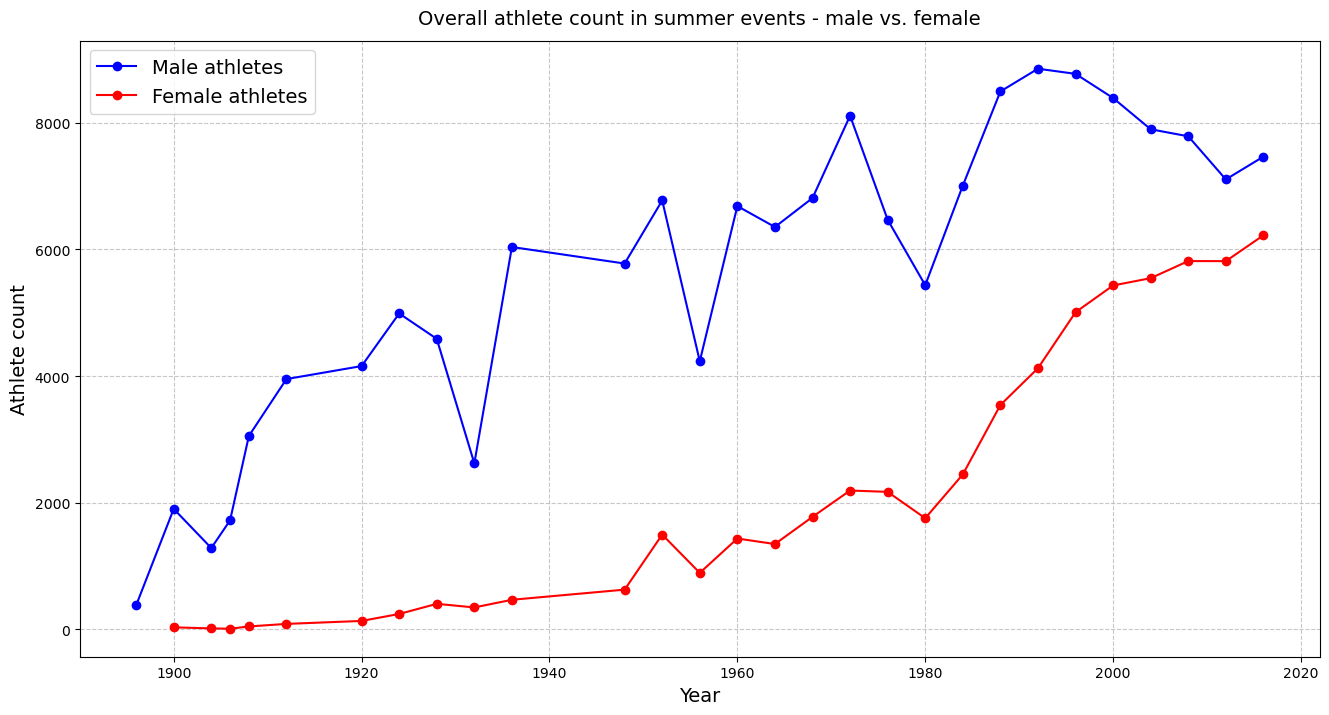

In [11]:
# Visualize the results using a line chart:
plt.figure(figsize = (16,8))

plt.plot(summer_athletes_male.year, summer_athletes_male.total_athletes, color = "blue", 
         marker = "o", label = "Male athletes")
plt.plot(summer_athletes_female.year, summer_athletes_female.total_athletes, color = "red", 
         marker = "o", label = "Female athletes")
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Athlete count", fontsize = 14)
plt.title("Overall athlete count in summer events - male vs. female", fontsize = 14, pad = 12)
plt.legend(fontsize = 14, loc = "upper left")

# Add grid:
plt.grid(True, linestyle = "--", alpha = 0.7)

plt.show()

In [12]:
# SQL query for male athletes participating in winter events:
winter_athletes_male = (pysqldf('''
                                   SELECT Year AS year
                                                    , COUNT(*) AS total_athletes
                                   FROM winter_events
                                   WHERE Sex = "M"
                                   GROUP BY Year
                                ''')
                       )
# SQL query for female athletes participating in winter events:
winter_athletes_female = (pysqldf('''
                                     SELECT Year AS year
                                                    , COUNT(*) AS total_athletes
                                     FROM winter_events
                                     WHERE Sex = "F"
                                     GROUP BY Year
                                  ''')
                         )

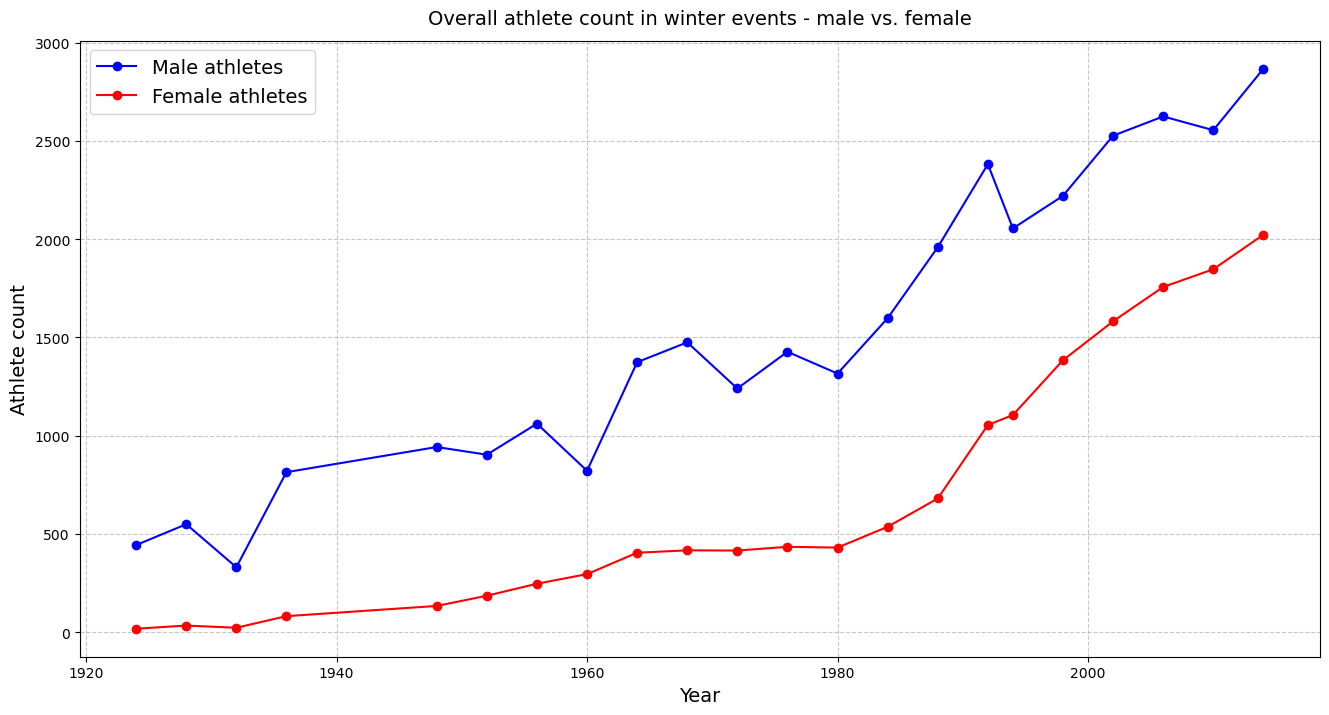

In [13]:
# Visualize the results using a line chart:
plt.figure(figsize = (16,8))

plt.plot(winter_athletes_male.year, winter_athletes_male.total_athletes, color = "blue", 
         marker = "o", label = "Male athletes")
plt.plot(winter_athletes_female.year, winter_athletes_female.total_athletes, color = "red", 
         marker = "o", label = "Female athletes")
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Athlete count", fontsize = 14)
plt.title("Overall athlete count in winter events - male vs. female", fontsize = 14, pad = 12)
plt.legend(fontsize = 14, loc = "upper left")

# Add grid:
plt.grid(True, linestyle = "--", alpha = 0.7)

plt.show()

Considering the 3 graphs above, it is clear that the athlete count has exhibited a consistent and noticeable upward trend over the years, indicating a continuous growth in participation in the sporting events, both for male and female participants.

In the next part, I will take a look at how did the medal count increase / decrease over the analyzed period, comparing male vs. female athletes.

In [14]:
# SQL query for medals won in summer events:
summer_medals = (pysqldf('''
                           SELECT Year AS year
                                    , COUNT(Medal) AS total_medals
                           FROM summer_events
                           GROUP BY Year
                        ''')
                 )
# SQL query for medals won in winter events:
winter_medals = (pysqldf('''
                           SELECT Year AS year
                                    , COUNT(Medal) AS total_medals
                           FROM winter_events
                           GROUP BY Year
                        ''')
                 )

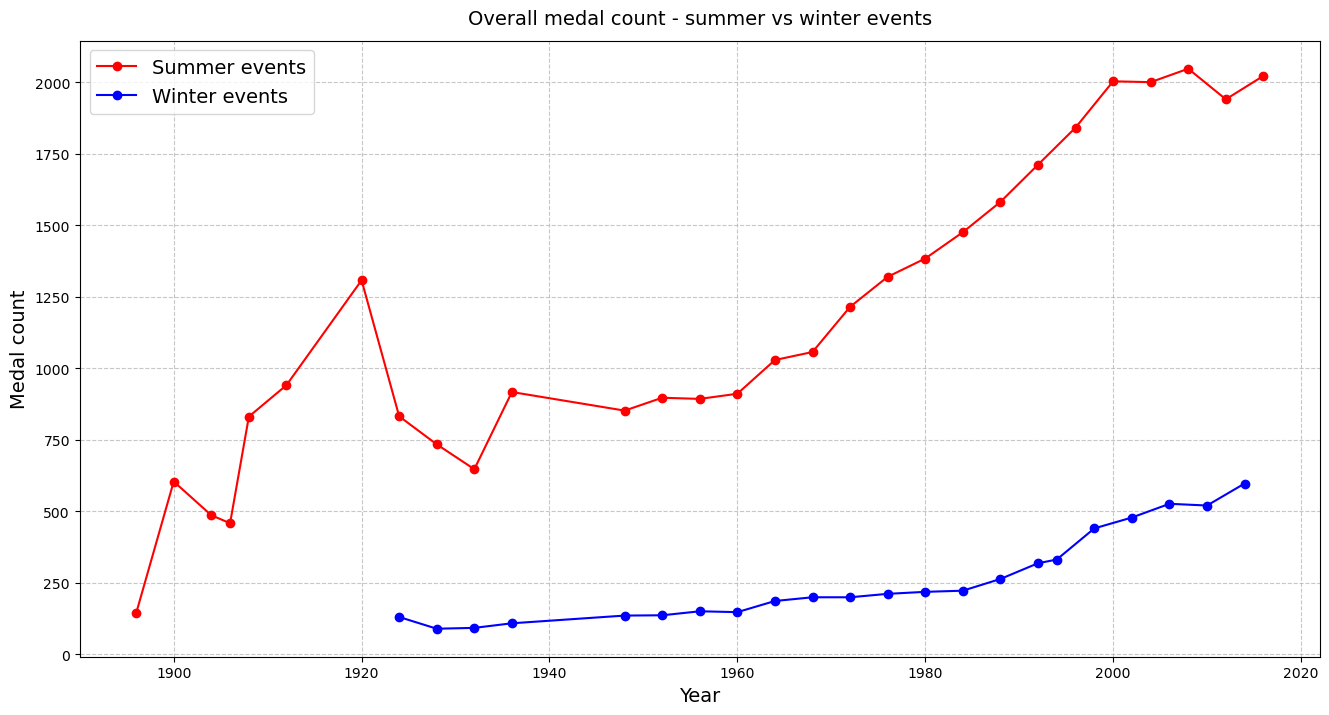

In [15]:
# Visualize the results using a line chart:
plt.figure(figsize = (16,8))

plt.plot(summer_medals.year, summer_medals.total_medals, color = "red", 
         marker = "o", label = "Summer events")
plt.plot(winter_medals.year, winter_medals.total_medals, color = "blue", 
         marker = "o", label = "Winter events")
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Medal count", fontsize = 14)
plt.title("Overall medal count - summer vs winter events", fontsize = 14, pad = 12)
plt.legend(fontsize = 14, loc = "upper left")

# Add grid:
plt.grid(True, linestyle = "--", alpha = 0.7)

plt.show()

In [16]:
# SQL query for medal ratio for summer events:
summer_medals = pysqldf('''
                    SELECT Year AS year
                            , ROUND(CAST(medal_count AS FLOAT) / total_count, 2) AS medal_ratio
                            , ROUND(CAST(gold_count AS FLOAT) / medal_count, 2) AS gold_ratio
                            , ROUND(CAST(silver_count AS FLOAT) / medal_count, 2) AS silver_ratio
                            , ROUND(CAST(bronze_count AS FLOAT) / medal_count, 2) AS bronze_ratio
                    FROM (
                          SELECT Year
                                  , COUNT(*) AS total_count
                                  , SUM(CASE
                                           WHEN Medal IS NOT NULL 
                                           THEN 1 
                                           ELSE 0
                                        END) AS medal_count
                                  , SUM(CASE
                                           WHEN Medal = "Gold" 
                                           THEN 1 
                                           ELSE 0
                                        END) AS gold_count
                                 , SUM(CASE
                                           WHEN Medal = "Silver" 
                                           THEN 1 
                                           ELSE 0
                                        END) AS silver_count
                                 , SUM(CASE
                                           WHEN Medal = "Bronze" 
                                           THEN 1 
                                           ELSE 0
                                        END) AS bronze_count
                          FROM summer_events
                          GROUP BY Year 
                        ) x
                       ''')

print(summer_medals)

    year  medal_ratio  gold_ratio  silver_ratio  bronze_ratio
0   1896         0.38        0.43          0.30          0.27
1   1900         0.31        0.33          0.38          0.29
2   1904         0.37        0.36          0.34          0.31
3   1906         0.26        0.34          0.34          0.32
4   1908         0.27        0.35          0.34          0.31
5   1912         0.23        0.35          0.33          0.32
6   1920         0.30        0.38          0.34          0.28
7   1924         0.16        0.33          0.34          0.33
8   1928         0.15        0.33          0.33          0.34
9   1932         0.22        0.35          0.33          0.32
10  1936         0.14        0.34          0.34          0.32
11  1948         0.13        0.34          0.33          0.33
12  1952         0.11        0.34          0.32          0.33
13  1956         0.17        0.34          0.33          0.33
14  1960         0.11        0.34          0.32          0.34
15  1964

In [17]:
# SQL query for medal ratio for winter events:
winter_medals = pysqldf('''
                    SELECT Year AS year
                            , ROUND(CAST(medal_count AS FLOAT) / total_count, 2) AS medal_ratio
                            , ROUND(CAST(gold_count AS FLOAT) / medal_count, 2) AS gold_ratio
                            , ROUND(CAST(silver_count AS FLOAT) / medal_count, 2) AS silver_ratio
                            , ROUND(CAST(bronze_count AS FLOAT) / medal_count, 2) AS bronze_ratio
                    FROM (
                          SELECT Year
                                  , COUNT(*) AS total_count
                                  , SUM(CASE
                                           WHEN Medal IS NOT NULL 
                                           THEN 1 
                                           ELSE 0
                                        END) AS medal_count
                                  , SUM(CASE
                                           WHEN Medal = "Gold" 
                                           THEN 1 
                                           ELSE 0
                                        END) AS gold_count
                                 , SUM(CASE
                                           WHEN Medal = "Silver" 
                                           THEN 1 
                                           ELSE 0
                                        END) AS silver_count
                                 , SUM(CASE
                                           WHEN Medal = "Bronze" 
                                           THEN 1 
                                           ELSE 0
                                        END) AS bronze_count
                          FROM winter_events
                          GROUP BY Year 
                        ) x
                       ''')
print(winter_medals)

    year  medal_ratio  gold_ratio  silver_ratio  bronze_ratio
0   1924         0.28        0.42          0.29          0.28
1   1928         0.15        0.34          0.31          0.35
2   1932         0.26        0.35          0.35          0.30
3   1936         0.12        0.33          0.34          0.32
4   1948         0.13        0.30          0.36          0.34
5   1952         0.13        0.33          0.32          0.35
6   1956         0.11        0.34          0.33          0.33
7   1960         0.13        0.34          0.33          0.33
8   1964         0.10        0.33          0.36          0.31
9   1968         0.11        0.33          0.35          0.32
10  1972         0.12        0.35          0.32          0.33
11  1976         0.11        0.33          0.34          0.33
12  1980         0.12        0.33          0.33          0.33
13  1984         0.10        0.33          0.33          0.33
14  1988         0.10        0.33          0.33          0.33
15  1992

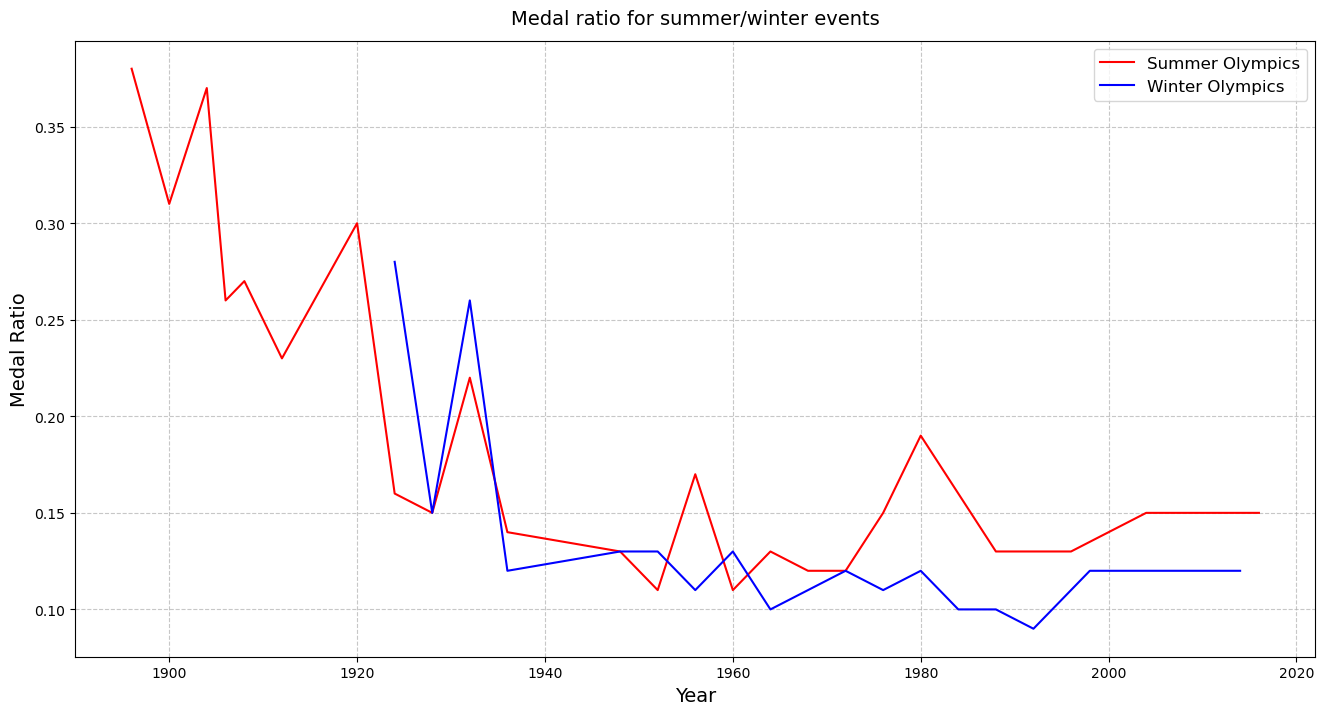

In [18]:
# Visualize the results using a line chart:
plt.figure(figsize = (16,8))

plt.plot(summer_medals.year, summer_medals.medal_ratio, color = "red", label = "Summer Olympics")
plt.plot(winter_medals.year, winter_medals.medal_ratio, color = "blue", label = "Winter Olympics")
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Medal Ratio", fontsize = 14)
plt.legend(fontsize = 12)
plt.title("Medal ratio for summer/winter events", fontsize = 14, pad = 12)
# Add grid:
plt.grid(True, linestyle = "--", alpha = 0.7)

plt.show()

Given the chart above, we can see that in the earlier stages of these sports competitions, up to the middle of the 20th century, there was a high fluctuation in medal ratios between events. After the 1990s, it appears that the ratio stabilizes. This may be a result of changes such as:
<br>
<br>
1. **Maturation of sports:** 
 - As a sport matures, participants, coaches, and governing bodies may develop better strategies, techniques, and training methods. Over time, the level of competition may stabilize as participants reach a plateau in terms of performance.
<br>
<br>
2. **Rule changes:** 
 - Changes in the rules of a sport can have a significant impact on performance. Once new rules are established and widely adopted, the impact on performance may stabilize, leading to a leveling off of trends.
<br>
<br>
3. **Records and limits:** 
 - In some cases, there may be physical or physiological limits to human performance in a given sport. Once these limits are approached, it becomes increasingly challenging for athletes to make significant improvements.

The two visualizations above also show that medal ratio tend to stabilize after mid 20th century for the summer events, and after the 1980s for the winter events. These findings confirm the previous analysis regarding the overall medal ratio.

My next analysis will have a look at how does an athlete's age influence his/her ability to receive medals.

In [19]:
# SQL query for total medals in summer events:
medal_count_by_age_summer = (pysqldf('''
                                   SELECT Age AS age
                                            , Medal AS medals
                                            , COUNT(Medal) AS total_medals
                                   FROM summer_events
                                   GROUP BY Age, Medal
                                ''')
                       )
# SQL query for total medals in winter events:
medal_count_by_age_winter = (pysqldf('''
                                   SELECT Age AS age
                                            , Medal AS medals
                                            , COUNT(Medal) AS total_medals
                                   FROM winter_events
                                   GROUP BY Age, Medal
                                ''')
                       )

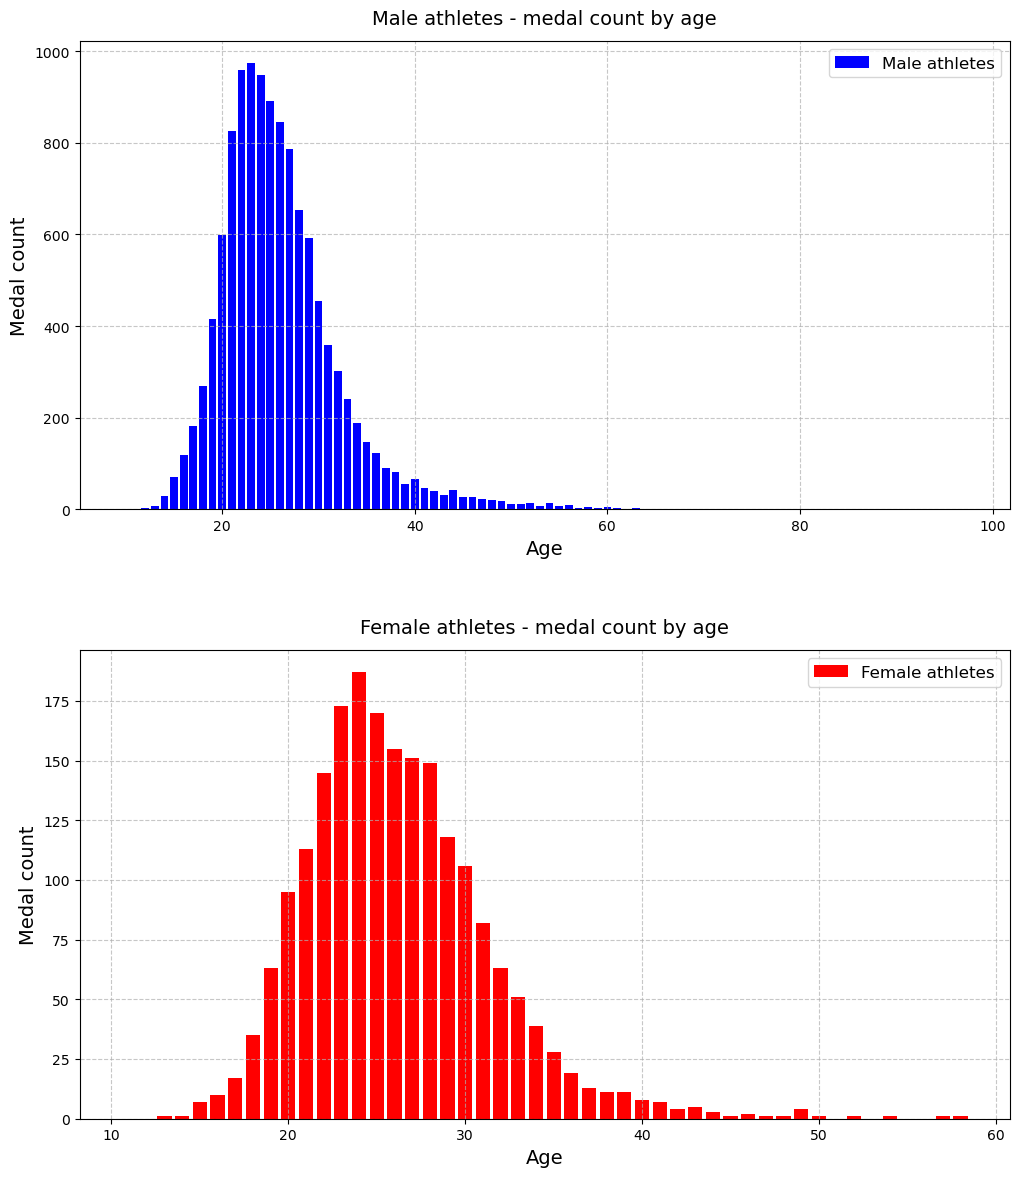

In [20]:
# Visualize the results using a line chart:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (12,14))

# Chart for male athletes:
ax[0].bar(medal_count_by_age_summer.age, medal_count_by_age_summer.total_medals, 
        color = "blue", label = "Male athletes")
ax[0].grid(True, linestyle = "--", alpha = 0.7)
ax[0].set_xlabel("Age", fontsize = 14)
ax[0].set_ylabel("Medal count", fontsize = 14)
ax[0].set_title("Male athletes - medal count by age", fontsize = 14, pad = 12)
ax[0].legend(fontsize = 12, loc = "upper right")

# Chart for female athletes:
plt.bar(medal_count_by_age_winter.age, medal_count_by_age_winter.total_medals, 
         color = "red", label = "Female athletes")
ax[1].grid(True, linestyle = "--", alpha = 0.7)
ax[1].set_xlabel("Age", fontsize = 14)
ax[1].set_ylabel("Medal count", fontsize = 14)
ax[1].set_title("Female athletes - medal count by age", fontsize = 14, pad = 12)
ax[1].legend(fontsize = 12, loc = "upper right")

# Add grid:
plt.grid(True, linestyle = "--", alpha = 0.7)

# Adjust the height space between the subplots
plt.subplots_adjust(hspace = 0.3)

plt.show()

The 2 graphs above show that the athletes aged between 20 and 30 have the highest count of medals received, which is true for both male and female participants.
***
In this case, we can conclude that athletes who are younger have more chances to win more medals than their counterparts.

### Submit 2-3 key points you may have discovered about the data, e.g. new relationships? Aha's! Did you come up with additional ideas for other things to review? 

Given my analysis so far, I've found that the athlete count has exhibited a consistent and noticeable upward trend over the years, indicating a continuous growth in participation in the sporting events.
<br>
There has also been a noticeable upward trend over the years in terms of total medals won by the athletes, which is true for both male and female participants.
<br>
Considering my initial hypotheses, I can conclude that all three of them have been confirmed by the analysis, as follows:
<br>

**Hypothesis no. 1: There are more male athletes than female.**
<br>
My analysis showed that during **summer events**, athlete participants consist in roughly **73.3% males** and **26.7% females**
and during **winter events**, athlete participants consist in roughly **69% males** and **31% females**.
<br>

**Hypothesis no. 2: The overall athlete performance has improved over the analyzed period, in terms of medals won.**
<br>
My analysis showed the following:
- for summer events, there is a noticeable increase in medals won starting with the 1960s.
- for winter events, there is a noticeable increase in medals won starting with the 1990s.
<br>

**The majority of athletes prefers to participate in summer events.**
<br>

**Hypothesis no. 3: Younger athletes tend to win more medals than their older adversaries.**
<br>
My analysis showed that the athletes aged between 20 and 30 have the highest count of medals received, which is true for both male and female participants.

### What additional questions are you seeking to answer?
In the next part of my analysis I will be taking a look at the following questions:
1. Does the performance of a team varies significantly during summer / winter evens?
2. Is there a correlation between a team's performance during summer and winter events?

### Beyond Descriptive Stats

In [21]:
# SQL query for total medals in summer events:
summer_medal_total = pysqldf('''
                             SELECT Year AS year
                                     , COUNT(*) AS total_count
                                     , SUM(CASE
                                               WHEN Medal IS NOT NULL 
                                               THEN 1 
                                               ELSE 0
                                           END) AS medal_count
                                     , SUM(CASE
                                               WHEN Medal = "Gold" 
                                               THEN 1 
                                               ELSE 0
                                           END) AS gold_count
                                     , SUM(CASE
                                               WHEN Medal = "Silver" 
                                               THEN 1 
                                               ELSE 0
                                           END) AS silver_count
                                     , SUM(CASE
                                               WHEN Medal = "Bronze" 
                                               THEN 1 
                                               ELSE 0
                                           END) AS bronze_count
                                 FROM summer_events
                                 GROUP BY Year 
                               ''')
print(summer_medal_total.head(10))

   year  total_count  medal_count  gold_count  silver_count  bronze_count
0  1896          380          143          62            43            38
1  1900         1936          604         201           228           175
2  1904         1301          486         173           163           150
3  1906         1733          458         157           156           145
4  1908         3101          831         294           281           256
5  1912         4040          941         326           315           300
6  1920         4292         1308         493           448           367
7  1924         5233          832         277           281           274
8  1928         4992          734         245           239           250
9  1932         2969          647         229           214           204


In [22]:
# SQL query for total medals in winter events:
winter_medal_total = pysqldf('''
                             SELECT Year AS year
                                     , COUNT(*) AS total_count
                                     , SUM(CASE
                                               WHEN Medal IS NOT NULL 
                                               THEN 1 
                                               ELSE 0
                                           END) AS medal_count
                                     , SUM(CASE
                                               WHEN Medal = "Gold" 
                                               THEN 1 
                                               ELSE 0
                                           END) AS gold_count
                                     , SUM(CASE
                                               WHEN Medal = "Silver" 
                                               THEN 1 
                                               ELSE 0
                                           END) AS silver_count
                                     , SUM(CASE
                                               WHEN Medal = "Bronze" 
                                               THEN 1 
                                               ELSE 0
                                           END) AS bronze_count
                                 FROM winter_events
                                 GROUP BY Year 
                               ''')
print(winter_medal_total.head(10))

   year  total_count  medal_count  gold_count  silver_count  bronze_count
0  1924          460          130          55            38            37
1  1928          582           89          30            28            31
2  1932          352           92          32            32            28
3  1936          895          108          36            37            35
4  1948         1075          135          41            48            46
5  1952         1088          136          45            44            47
6  1956         1307          150          51            49            50
7  1960         1116          147          50            48            49
8  1964         1778          186          61            67            58
9  1968         1891          199          66            70            63


### The 2 tables created will be used to calculate the Pearson correlation coefficient between the total number of medals in the winter and summer olympics.

Looking at the 2 newly created tables, we can see that winter events have started from 1924, compared to the summer events, which started in 1896. In this case, we will need to trim the summer events table so that it starts from 1924 aswell.

In [23]:
# Assign the new table to a variable:
summer_medal_total_new = summer_medal_total[7:]

Now, we can calculate the Pearson correlation coefficient between the total number of medals in the winter and summer sport events from 1924 to 2016.

In [24]:
x_simple = winter_medal_total.medal_count
y_simple = summer_medal_total_new.medal_count
result = np.corrcoef(x_simple, y_simple)

In [25]:
print(result)

[[1.         0.94141801]
 [0.94141801 1.        ]]


The Pearson correlation coefficient between the total number of medals in the winter and summer Olympics from 1924 to 2016, is 0.94, which is highly positive. Therefore, we can conclude that the performance of a country in winter olympics is highly correlated to that in summer olympics.
***
Next, we'll calculate the standard deviation in country performance through years. This statistical measure can show the extent to which countries' performances can differ from the average during  Summer / Winter Olympics.
<br>
A Comparison between average std of Winter and that of Summer Olympics will help.

In [26]:
# Assign the values to variables
std_medal_count_summer_olympics = np.std(y_simple)
std_medal_count_winter_olympics = np.std(x_simple)

# Display the results
print("std_medal_count_summer_olympics =",std_medal_count_summer_olympics)
print("std_medal_count_winter_olympics =",std_medal_count_winter_olympics)

std_medal_count_summer_olympics = 475.323015441357
std_medal_count_winter_olympics = 152.56899942903493


From 1924 to 2016, we can see that the standard deviation in the summer Olympics is about 3 times higher than in the winter Olympics. A higher standard deviation in the number of medals obtained in Summer Olympics suggests a more diverse and varied competitive landscape, with a broader range of performance outcomes among participating countries. 